# TP2

TEST MATRIX

$$
I = \left( \begin{matrix} 1 & 0 \\ 0 & 1 \end{matrix} \right)
$$

In [2]:
from qiskit import *
import qiskit.visualization as viz
import qiskit.quantum_info as quantum_info
import numpy as np
import json

In [3]:
Aer.backends()

def get_counts(circ):
    simulator = Aer.get_backend('aer_simulator')
    compiled_circuit = transpile(circ, simulator)
    job = simulator.run(compiled_circuit, shots=1000)
    result = job.result()
    counts = result.get_counts(circ)
    return counts

# Exercice 1

Question 3

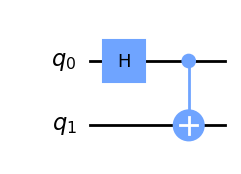

In [4]:
#Création d’un circuit quantique instance de QuantumCircuit
circ = QuantumCircuit(2)
#Ajouter une porte H pour l’entrée (qubit) 0 => superposition
circ.h(0)
# Ajouter l’opération CNOT avec 0 comme qubit de control et le qubit 1 comme cible
# => état de Bell
circ.cx(0, 1)

circ.draw('mpl')

# Exercice 2

Question 1

In [5]:
def run(circuit):
    simulator = Aer.get_backend('qasm_simulator')
    job = execute(circuit, simulator, shots=1024)

    # Get the results
    result = job.result()
    counts = result.get_counts(circuit)
    print(counts)

La porte Hadamard transforme les états $|0\rangle$ en
$$\frac {|0\rangle +|1\rangle }{\sqrt {2}}$$
et $|1\rangle$ en
$$\frac {|0\rangle -|1\rangle }{\sqrt {2}}$$

La matrice associée est $H = \frac{1}{\sqrt{2}} \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}$

La porte Hadamard crée une superposition où la probabilité de mesure des deux états de base est équiprobable ($\alpha^{2} = \beta^{2} = \frac{1}{2}$)

{'0': 503, '1': 521}


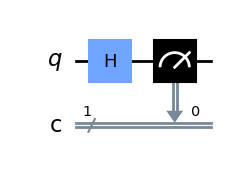

In [6]:
circ = QuantumCircuit(1, 1)
circ.h(0)
circ.measure(0, 0)

run(circ)
circ.draw('mpl')

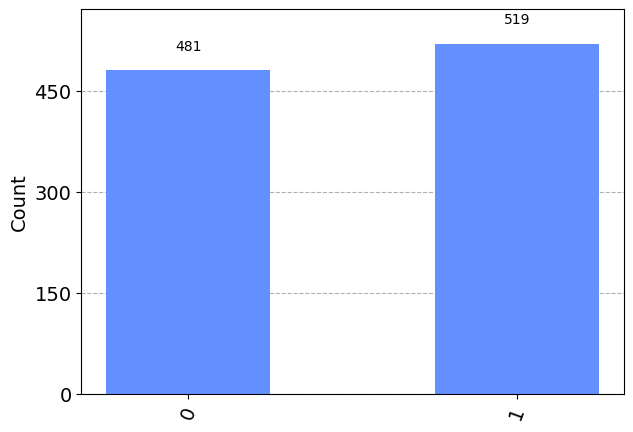

In [7]:
viz.plot_histogram(get_counts(circ))

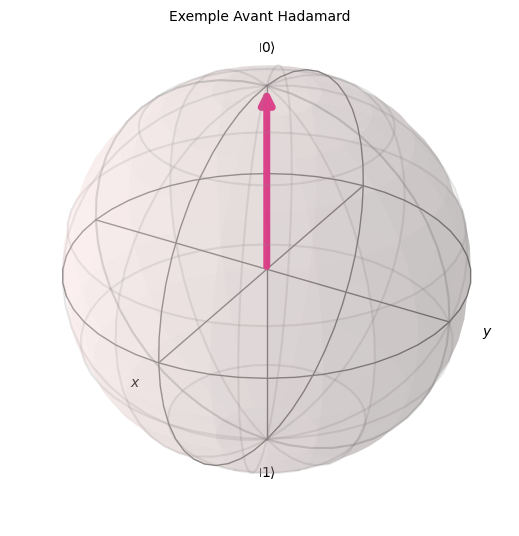

In [8]:
viz.plot_bloch_vector([0,0,1], title="Exemple Avant Hadamard")

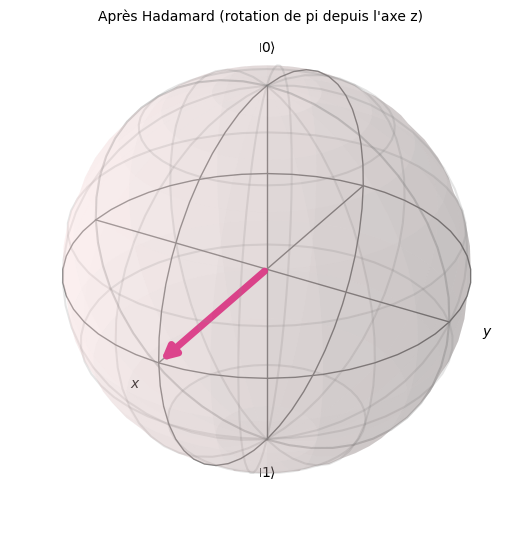

In [9]:
viz.plot_bloch_vector([1,0,0], title="Après Hadamard (rotation de pi depuis l'axe z)")

TESTING : Plot State City with cx

DensityMatrix([[0.5+0.j, 0. +0.j, 0. +0.j, 0.5+0.j],
               [0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j],
               [0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j],
               [0.5+0.j, 0. +0.j, 0. +0.j, 0.5+0.j]],
              dims=(2, 2))


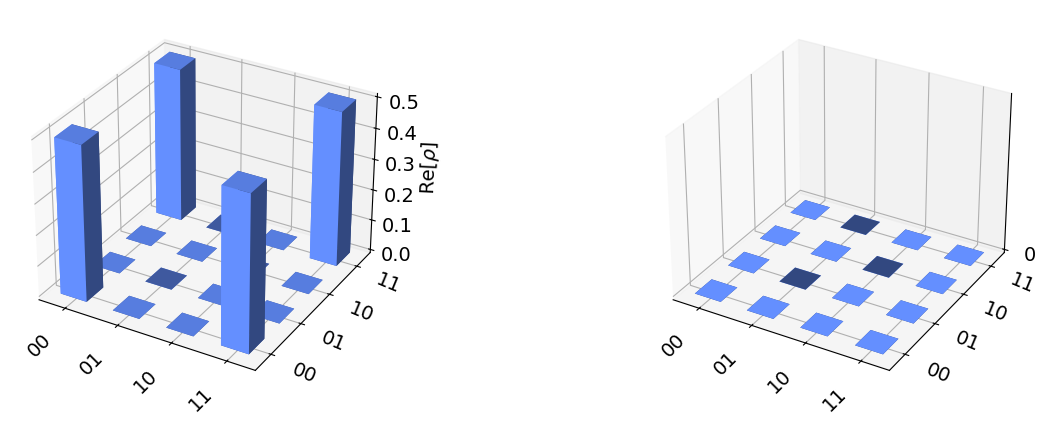

In [10]:
circ = QuantumCircuit(2, 1)
circ.h(0)
circ.cx(0, 1) # C not with bit 0 used for measurement (bit 0 put into a superposition by Hadamard)
state = quantum_info.DensityMatrix(circ)
print(state)
viz.plot_state_city(state)

La porte C-Not...

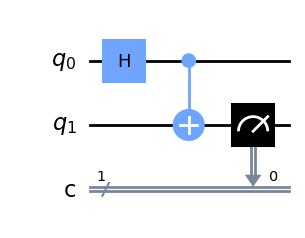

In [11]:
circ.measure(1, 0)
circ.draw('mpl')

La porte NOT (ou Pauli-X) inverse les états $|0\rangle$ et $|1\rangle$ 

La matrice associée est $X = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix}$

Par exemple $X \cdot ( \alpha|0\rangle + \beta|1\rangle ) = ( \beta|0\rangle + \alpha|1\rangle )$

{'1': 1024}


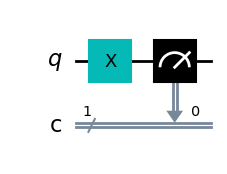

In [12]:
circ = QuantumCircuit(1, 1)
circ.x(0)
circ.measure(0, 0)

run(circ)
circ.draw('mpl')

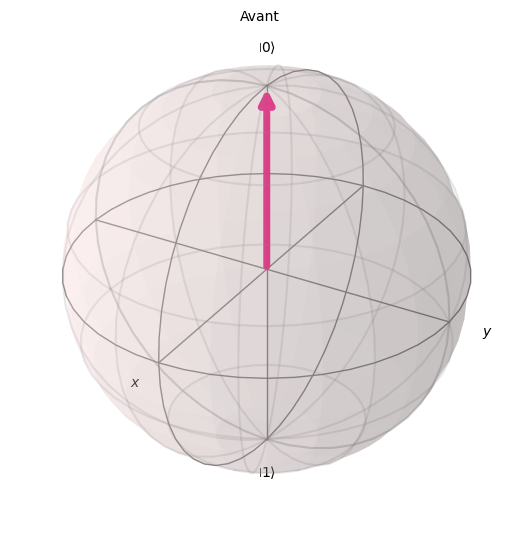

In [13]:
viz.plot_bloch_vector([0,0,1], title="Avant")

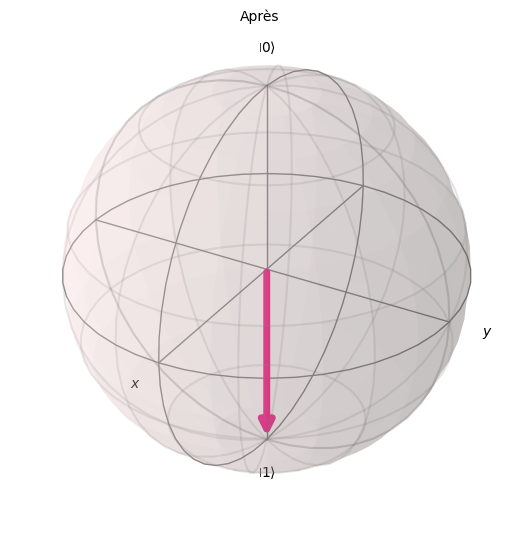

In [14]:
viz.plot_bloch_vector([0,0,-1], title="Après")

# Exercice 3

### Expliquer le phénomène de l'exercice 1 avec les opérations matricielles : 

Le circuit applique d'abord une porte Hadamard au qbit 0, qui vaut $|0\rangle$ initialement.

$H = \frac{1}{\sqrt{2}} \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}$

$H|0\rangle = \frac{ |0\rangle + |1\rangle }{ \sqrt{2} }$ 

A ce stade, l'état des 2 qbits du système est le suivant :

(résultat du produit $H|0\rangle \otimes |1\rangle$)

$ \frac{1}{\sqrt{2}} \begin{bmatrix} 1 \\ 0 \\ 1 \\ 0 \end{bmatrix}
\begin{bmatrix} |00\rangle \\ |01\rangle \\ |10\rangle \\ |11\rangle \end{bmatrix}$

La porte C-Not s'applique ensuite, et on se retrouve finalement avec l'un des états de Bell :

$CNOT = \begin{bmatrix} 1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0 \end{bmatrix}$

$CNOT \frac{1}{\sqrt{2}} \begin{bmatrix} 1 \\ 0 \\ 1 \\ 0 \end{bmatrix} = \frac{1}{\sqrt{2}} \begin{bmatrix} 1 \\ 0 \\ 0 \\ 1 \end{bmatrix}$

Lors de la Mesure d'un des deux qbits, on est donc garanti que l'autre qbit aura la même valeur.
Obtenir $|00\rangle$ ou $|11\rangle$ devrait être équiprobable, ce que semblent suggérer les mesures par le simulateur et par l'API IBMQ.

### Mesures sur un simulateur puis sur la machine IBMQ

In [15]:
def bell(circ: QuantumCircuit, a: int, b: int) -> QuantumCircuit:
    """
    ajoute une porte Hadamard sur le bit au rang a
    et une porte C-Not sur (a, b) utilisant a comme condition
    de manière à créer un état de Bell.
    """
    circ.h(a)
    circ.cx(a, b)
    return circ

Création d'un circuit

In [16]:
circ = QuantumCircuit(2, 2)
bell(circ, 0, 1)
circ.measure_all(add_bits=False)

Obtention de résultats auprès de différentes plateformes

In [17]:
simulator = Aer.get_backend('aer_simulator')
circ = transpile(circ, simulator)
result = simulator.run(circ).result()
counts_sim = result.get_counts(circ)

In [18]:
# IMPORT DE TOKEN IMBQ
import os
assert os.path.exists('tokens.json') # SINON DEFINIR SON TOKEN DIRECTEMENT
# token = "..."

with open('tokens.json', 'r') as f:
    token = json.load(f)['ibmq']

In [19]:
from qiskit_ibm_runtime import QiskitRuntimeService
service = QiskitRuntimeService(channel='ibm_quantum')
print(service.instances())
QiskitRuntimeService().backends() # Recherche des backends disponibles

['ibm-q/open/main']


[<IBMBackend('ibmq_qasm_simulator')>,
 <IBMBackend('ibm_nairobi')>,
 <IBMBackend('ibm_lagos')>,
 <IBMBackend('ibm_brisbane')>,
 <IBMBackend('simulator_extended_stabilizer')>,
 <IBMBackend('simulator_mps')>,
 <IBMBackend('simulator_statevector')>,
 <IBMBackend('simulator_stabilizer')>,
 <IBMBackend('ibm_perth')>]

In [20]:
IBMQ.save_account(token)
provider = IBMQ.load_account()

backend = provider.get_backend('ibm_brisbane') # le backend quito n'est pas disponible

optimized_circuit = transpile(circ, backend)
optimized_circuit.draw()

job = backend.run(optimized_circuit) # suivi d'usage : https://quantum-computing.ibm.com/
retrieved_job = backend.retrieve_job(job.job_id())
result = retrieved_job.result()
print(result.get_counts())

C:\Users\ongki\AppData\Local\Temp\ipykernel_16996\1495951914.py:1: DeprecationWarning: The package qiskit.providers.ibmq is being deprecated. Please see https://ibm.biz/provider_migration_guide to get instructions on how to migrate to qiskit-ibm-provider (https://github.com/Qiskit/qiskit-ibm-provider) and qiskit-ibm-runtime (https://github.com/Qiskit/qiskit-ibm-runtime).
  IBMQ.save_account(token)
C:\Users\ongki\AppData\Local\Temp\ipykernel_16996\1495951914.py:1: DeprecationWarning: The qiskit.IBMQ entrypoint and the qiskit-ibmq-provider package (accessible from 'qiskit.providers.ibmq`) are deprecated and will be removed in a future release. Instead you should use the qiskit-ibm-provider package which is accessible from 'qiskit_ibm_provider'. You can install it with 'pip install qiskit_ibm_provider'. Just replace 'qiskit.IBMQ' with 'qiskit_ibm_provider.IBMProvider'
  IBMQ.save_account(token)
configrc.store_credentials:WARNING:2023-10-08 22:08:41,486: Credentials already present. Set ov

KeyboardInterrupt: 

Erreur lors de l'exécution. Le résultat est visible sur l'interface web d'IBM.

### Visualisation des résultats

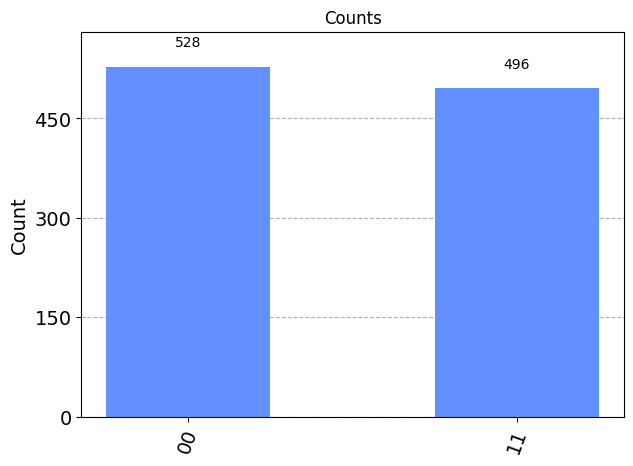

In [ ]:
viz.plot_histogram(counts_sim, title='Counts')